# Chameleon data set Density Peaks

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sb
from sklearn import datasets

In [2]:
sb.set()

In [3]:
%load_ext autoreload
import sys
sys.path.append("/home/gmancini/Dropbox/appunti/old_search_algos_28_08_2020/EvolutionaryAlgorithms/src")
sys.path.append("/home/gmancini/Dropbox/appunti/old_search_algos_28_08_2020/molecule_utils")
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/test")
sys.path.append("/home/gmancini/Dropbox/fit_test")
import ga_evolution, ga_population
import myclusters, myvalidation, mdutils, opt_noise_ga
%autoreload 2

# test data set

In [4]:
ch=np.loadtxt("ch.dat")
ch.shape

(8000, 2)

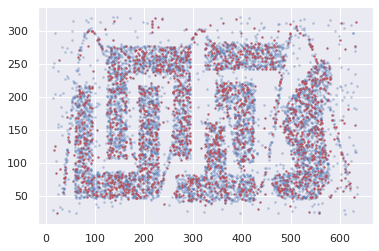

In [5]:
plt.scatter(ch[:,0],ch[:,1],c='b',alpha=0.25,s=3)
plt.scatter(ch[::4,0],ch[::4,1],c='r',alpha=0.75,s=1.5)

In [6]:
X=ch[::4]

In [7]:
cutoff = "auto"
estimator = myclusters.density_peaks(cutoff=cutoff,kernel="gaussian",\
                                     metric="euclidean")
                                     #metric="euclidean",X=np.loadtxt("fig2_panelB.dat"))
print("Cutoff: ",estimator.cutoff)
rho,delta = estimator.decision_graph(X=X)
nneigh = estimator.nneigh
print(len(nneigh))
np.any(nneigh==0.)

Determining cutoff using a % of neighbors= 2.0
Cutoff:  auto
2000


True

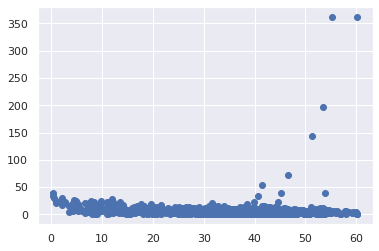

In [8]:
plt.scatter(rho,delta)

In [9]:
centroids,points = estimator.get_centroids(rmin=45,dmin=50)
print("Found ",estimator.nclusters," clusters")
print("Cores: ",centroids)

Found  5  clusters
Cores:  [ 103  316  890 1039 1508]


Text(0.5, 1.0, 'Decision graph')

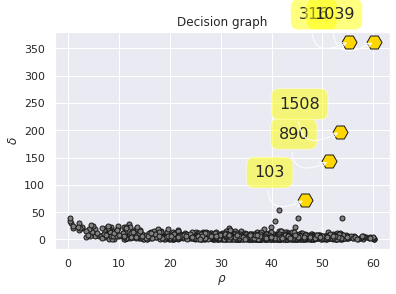

In [10]:
plt.plot(rho[points], delta[points], 'o', markerfacecolor="gray",\
    markeredgecolor='k', markersize=5)

plt.plot(rho[centroids], delta[centroids], 'H', markerfacecolor="gold",\
    markeredgecolor='k', markersize=15)

for c, x, y in zip(centroids, rho[centroids], delta[centroids]):
    plt.annotate(
        c,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=1'),
        fontsize=16)

#left = [1030]
#for c, x, y in zip(left, rho[left], delta[left]):
#    plt.annotate(
#        c,
#        xy = (x, y), xytext = (-50, 0),
#        textcoords = 'offset points', ha = 'right', va = 'bottom',
#        bbox = dict(boxstyle = 'round,pad=0.4', fc = 'yellow', alpha = 0.5),
##        arrowprops = dict(arrowstyle = '->', connectionstyle = 'bar'),
#        fontsize=16)     
    
plt.xlabel(r"$\rho$")
plt.ylabel("$\delta$")
plt.title('Decision graph')

In [11]:
clusters = estimator.assign_points()
print(clusters)
for c in centroids:
    N = len(clusters[clusters==c])
    print("%d elements found in cluster %d" % (N,c))

[1039  890  890 ...  890  316  103]
341 elements found in cluster 103
480 elements found in cluster 316
325 elements found in cluster 890
503 elements found in cluster 1039
351 elements found in cluster 1508


In [12]:
robust_clusters = estimator.create_halo()
for c in centroids:
    N = len(robust_clusters[robust_clusters==c])
    H = len(clusters[clusters==c]) - N
    print("%d elements and %d HALO points found in cluster %d" % (N,H,c))

84 elements and 257 HALO points found in cluster 103
397 elements and 83 HALO points found in cluster 316
97 elements and 228 HALO points found in cluster 890
209 elements and 294 HALO points found in cluster 1039
115 elements and 236 HALO points found in cluster 1508


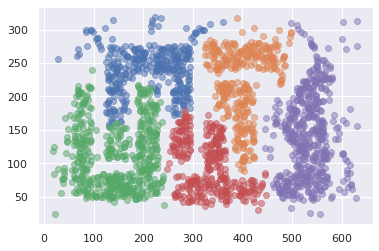

In [13]:
for i in set(clusters):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[clusters==-1,0],X[clusters==-1,1],marker='h',c='k')

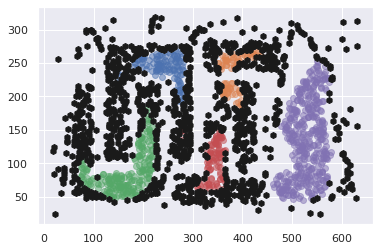

In [14]:
for i in set(clusters):
    plt.scatter(X[robust_clusters==i,0],X[robust_clusters==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[robust_clusters==-1,0],X[robust_clusters==-1,1],marker='h',c='k')